In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv("E:/ML/Applied ML Algorithms/L1/train.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# lets fill the missing values
df["Age"].fillna(df["Age"].mean(), inplace= True)

## combine parch and sibsp

<Figure size 432x288 with 0 Axes>

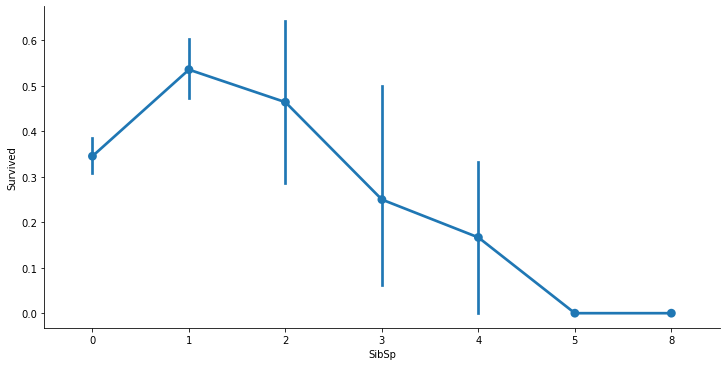

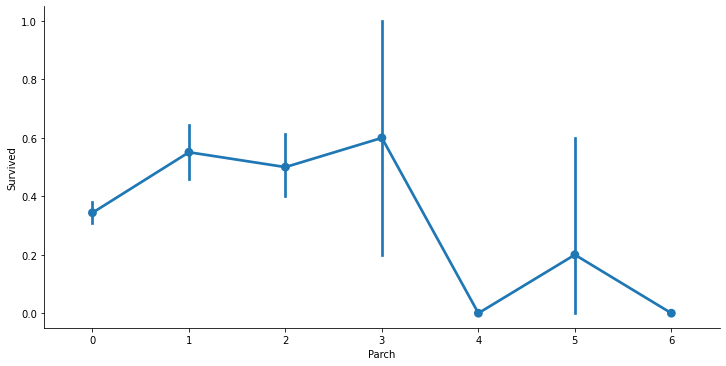

In [7]:
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col , y='Survived' , data=df , kind='point', aspect=2, )

In [8]:
df['Family_cnt'] = df['SibSp'] + df['Parch']

In [9]:
df.drop(['PassengerId', 'SibSp', 'Parch'] , axis=1, inplace=True)

In [10]:
df.groupby(df['Cabin'].isnull())['Survived'].mean()
# it means the cabin was not missing at random
# this means the the people who didnt have the cabin was very unlikely to survive
# groupby will create two different DFs(cabin is missing and cabin is not missing) and will check the survive rate.As the survival rate is binary so we are taking mean to find the survival rate of each group


Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [11]:
# we are making a simple cabin indicator
df['Cabin_ind'] = np.where(df['Cabin'].isnull(),0,1)
# where acts like if-else
# if cabin missing is true then 0 if false then 1
df.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [12]:
gender_num = { 'male':0 , 'female':1}
df['Sex'] = df['Sex'].map(gender_num)
df.head(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [13]:
df.drop(['Cabin','Embarked','Name','Ticket'], axis=1 ,inplace=True)

## write out cleaned dataset

In [15]:
df.to_csv('/ML/Applied ML Algorithms/L1/titatic_clean.csv', index=False)